<a href="https://colab.research.google.com/github/elinthind/influenza_model/blob/main/SIR_model_in_a_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code attempts to make a spatial SIR model using a fully connected network model. It is thought that the strength of the couplings between nodes can help simulate transportation networks and cities vs rural areas. This should enable global spread of an epidemic into a pandemic and can be slowly increased in complexity using other epidemiological models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Setup variables

Each node will have a an array to store S, I, and R. There will then be an array of such nodes. 

We will have a coupling matrix which will have 1s on the diagonal to show full coupling within a node and a factor showing commutes of connected infected populations into this node. This matrix will not be symmetric to help simulate the ideas of cities. People will commute into a city for work/social reasons but fewer will leave the city and go to the suburbs for work/social reasons. This means we'll have nodes where a lot go from A to B but only a few go from B to A. This makes the coupling asymmetric.

The differential equations for the system then become:

$\frac{dS_j}{dt}=\sum_{n=1}^{M}{-\beta I_n c_{nj} S_j/N_j}$

$\frac{dI_j}{dt}=\sum_{n=1}^{M}{\beta I_n c_{nj} S_j/N_j-\gamma I_j}$ 

$\frac{dS_j}{dt}=\gamma I_j$ 

where $c_{nj}$ is the coupling matrix, $N_j$ is the population of a given node, $M$ is the number of nodes, $\beta$ is the the normal SIR model infection rate, and $\gamma$ is the normal SIR model recovery rate. We'll use a normal differential equation solver to find the next time step for each node using the values from the previous time step. We might move to more complex solvers later.

In [2]:
num_nodes = 10
states = np.zeros((10,3))

# initialize the populations to all be in S.
states[:,0]=1

# create coupling matrix. The diagonal will be all 1 so just use identity matrix
couplings = np.identity(num_nodes)

# Make node 5 be a city so many nodes strongly couple to 5 but 5 only weakly couples out.
# so this means column 5 will have larger values but the row five values will be smaller

couplings[:,0] = [1,.10,.05,.01,.01,.01,.01,.01,.01,.01]
couplings[:,1] = [.10,1,.10,.05,.01,.01,.01,.01,.01,.01]
couplings[:,2] = [.05,.10,1,.10,.05,.01,.01,.01,.01,.01]
couplings[:,3] = [.01,.05,.10,1,.10,.05,.01,.01,.01,.01]
couplings[:,4] = [.01,.01,.05,.10,1,.10,.05,.01,.01,.01]
couplings[:,5] = [.01,.10,.15,.20,.30,1,.20,.15,.10,.01]
couplings[:,6] = [.01,.01,.01,.01,.05,.10,1,.10,.05,.01]
couplings[:,7] = [.01,.01,.01,.01,.01,.05,.10,1,.10,.05]
couplings[:,8] = [.01,.01,.01,.01,.01,.01,.05,.10,1,.10]
couplings[:,9] = [.01,.01,.01,.01,.01,.01,.01,.05,.10,1]

In [3]:
couplings

array([[1.  , 0.1 , 0.05, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
       [0.1 , 1.  , 0.1 , 0.05, 0.01, 0.1 , 0.01, 0.01, 0.01, 0.01],
       [0.05, 0.1 , 1.  , 0.1 , 0.05, 0.15, 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.05, 0.1 , 1.  , 0.1 , 0.2 , 0.01, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.05, 0.1 , 1.  , 0.3 , 0.05, 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.05, 0.1 , 1.  , 0.1 , 0.05, 0.01, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.05, 0.2 , 1.  , 0.1 , 0.05, 0.01],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.15, 0.1 , 1.  , 0.1 , 0.05],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.1 , 0.05, 0.1 , 1.  , 0.1 ],
       [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.1 , 1.  ]])

## plot couplings

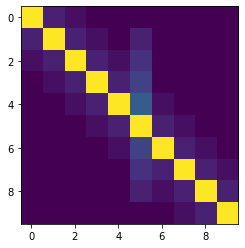

In [4]:
plt.imshow(couplings)

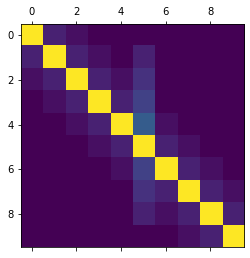

In [5]:
plt.matshow(couplings)

In [6]:
# taken from matplotlib Bar3D plot example found here:
# https://matplotlib.org/stable/gallery/mplot3d/3d_bars.html#sphx-glr-gallery-mplot3d-3d-bars-py

%matplotlib notebook

# setup the figure and axes
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111, projection='3d')

# fake data
_x = np.arange(num_nodes)
_y = np.arange(num_nodes)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

data = np.array(couplings)
for i in range(num_nodes):
    data[i,i] = 0

top = data.flatten()
bottom = np.zeros_like(top)
width = depth = 1

colors = cm.turbo(data.flatten())

ax1.bar3d(x, y, bottom, width, depth, top, color=colors)
ax1.set_title('couplings')
ax1.view_init(elev=60., azim=-30)

plt.show()

<IPython.core.display.Javascript object>

NameError: ignored

<IPython.core.display.Javascript object>

# setup differential equations
First we'll just setup a single node as an example and then we'll move to connected nodes.

(I'm copying an example for multiple variable models from: https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples)

In [ ]:
from scipy.integrate import solve_ivp

def SIR(t, S, beta, gamma, N):
     return [-beta*S[0]*S[1]/N, beta*S[0]*S[1]/N-gamma*S[1], gamma*S[1]]

In [ ]:
N = 100
I = 5
tspan = np.linspace(0,200,100)
SIR_init = [N-I,I,0]
beta = .1
gamma = .03

sol = solve_ivp(lambda t, S: SIR(t, S, beta, gamma, N),[tspan[0],tspan[-1]],SIR_init,t_eval=tspan,rtol=1e-5)

In [ ]:
%matplotlib inline
plt.plot(sol.t,sol.y[0],sol.t,sol.y[1],sol.t,sol.y[2])

## node model
Here I try to scale this to our node model. I'm not currently sure how use the built in ode solvers with this scheme so I need to make a simple single time step solver of my own. I'll try 2nd order Runge-Kutta first due to its simplicity but better behavior over Euler's.

In [ ]:
#This function implements RK2 for a specific node

def SIR_node(t_step,S,I,I_n,R,beta,gamma,N,coupling):
    k1S = t_step*np.sum(-beta*S*I*coupling/N)
    k2S = t_step*np.sum((-beta*(S+k1S/2)*I/N))
    
    k1I = t_step*(np.sum(beta*S*I*coupling/N)-gamma*I_n)
    k2I = t_step*(np.sum(beta*S*(I*coupling+k1I*coupling/2)/N)-gamma*(I_n+k1I/2))
    
    k1R = t_step*gamma*I_n
    k2R = t_step*gamma*(I_n+k1I/2)
    
    return [S+k2S,I+k2I,R+k2R]

In [ ]:
s=[100,100,100,100,100,100,100,100,100,100]
I=np.array([1,2,3,4,5,6,7,8,9,10])
np.sum(-beta*s[0]*I*couplings[:,5]/N)

In [ ]:
-beta*s[0]*I*couplings[:,5]/N

In [ ]:
couplings[:,5]

In [ ]:
SIR_node(.1,95,I,5,.1,.1,100,couplings[:,5])

In [ ]:
# implement multi-node model
num_steps = 100
t_step = 1
beta = .1
gamma = .05

N=np.array([100,100,100,100,100,100,100,100,100,100])
S=np.ones((num_steps,num_nodes))
I=np.ones((num_steps,num_nodes))
R=np.zeros((num_steps,num_nodes))

I_init = np.array([3,10,3,0,0,0,0,0,0,0])
S[0] = N-I_init
I[0] = I_init


for t in range(num_steps-1):
    for i in range(num_nodes):
        temp = SIR_node(t_step,S[t,i],I[t],I[t,i],R[t,i],beta,gamma,N[i],couplings[:,i])
        S[t+1,i] = temp[0]
        I[t+1,i] = temp[1][i]
        R[t+1,i] = temp[2]

In [ ]:
%matplotlib inline
plt.plot(S)

In [ ]:
plt.plot(I)

In [ ]:
plt.plot(R)

## Visualizations
3D visualizations of the outputs and animated versions

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(I.transpose())

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(I.transpose())

In [ ]:
import matplotlib.animation as animation

%matplotlib notebook
fig, ax = plt.subplots(figsize=(10, 7))

x=range(num_nodes)

def animate(i):
    ax.bar(x,I[i,:])
    return ax.patches

ani = animation.FuncAnimation(fig, animate, num_steps, interval=50, blit=True,repeat_delay=1000)

In [ ]:
len(I)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(range(num_nodes),I[1,:])

In [ ]:
ax.patches